<a href="https://colab.research.google.com/github/leakysam/Customer-Churn/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Dataset
##The dataset includes information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

##If a company can predict whether the customer will leave the service, it will try to retain the customer. The last column, Churn, indicates whether the customer has canceled the contract. If a customer has canceled the contract, it is displayed with yes, if not, it is displayed with no. This variable is our target variable. The other variables are also called features.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Understanding The Dataset
## Look at the shape of the data
###the dataset consists of 7043 rows and 21 columns. Let me show you the types of columns in the dataset.

In [ ]:
df.shape

#Output
(7043, 21)

(7043, 21)

# Data Preprocessing
###Pandas automatically determines the type of each column. However, the data types of the columns are sometimes determined incorrectly. It is an important task to check the type of columns before building the model.

###For example, the SeniorCitizen column consists of 0 and 1, the type of this column is specified as numeric. You can convert this column into object type. However, since this column has a limited number of values, you don’t need to convert the type of this column.

###TotalCharges refers to the total payment. The payment has to be a numeric value. Let’s convert this column to the numeric type with the to_numeric method.

### I used the error="coerce" argument to convert a non-numeric value to NaN.

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

##Handling Missing Data
###Let’s take a look at missing data in the dataset with the isnull().sum() method.

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##As you can see, the TotalCharges column has missing data. Let’s assign 0 to missing values ​​with the fillna method.

In [ ]:
df.TotalCharges = df.TotalCharges.fillna(0)

In [ ]:
#In the dataset, some of the column names start with a lowercase letter. Let’s convert the column names to lowercase, and put underscores to spaces between the column names.
df.columns = df.columns.str.lower().str.replace(' ', '_')
#Note that some column values of type Object contain spaces and are case-mismatched. Let’s standardize these values.
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
#Now, let’s handle the target variable and convert the values of this column into numeric.
df.churn = (df.churn == 'yes').astype(int)
#Let’s take a look at the final version of the dataset.
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


#Splitting the Dataset
###In machine learning, the dataset is split into training and testing. The model is built with the training data and the model is evaluated with the test data. Let’s split the dataset with the train_test_split method.

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

##In machine learning, validation data is used to measure the performance of the model. With this data, you can fine-tune the hyperparameters to find the best model. Let’s create validation data with the train_test_split method.

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

##Now let’s create the target variables and remove the target columns from the training and validation sets.

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_val['churn']

#Feature Engineering
###Machine learning algorithms like to work with numeric values. This process is called one-hot encoding. You can perform one-hot encoding with the get_dummies method in Pandas or the OneHotEncoder method in Scikit-learn.

###In this tutorial, I’m going to use the dictVectorizer class for one-hot coding. To use this method, let’s first convert the data into a dictionary structure. First, let’s create variables for categorical and numeric columns.

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',  'contract',
               'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
#Now let’s convert the training set to the dictionary.
train_dict = df_train[categorical + numerical].to_dict(orient="records")
train_dict[:1]

[{'gender': 'male',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'no',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 72,
  'monthlycharges': 74.4,
  'totalcharges': 5360.75}]

In [ ]:

#Now let’s convert categorical values to one-hot encoding.
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 7.44000e+01, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 5.36075e+03])

###You can also see the values ​​of the columns with the get_feature_names_out() method.

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

#Logistic regression

###To solve the classification problem, you can use many algorithms such as Naive Bayes, random forest, and artificial neural networks. As a general rule, start with the simplest model first. If the performance of the model you built is not good, more complex models are tried.

###As you know, regression models are used when the target variable is numerical. Logistic regression is a linear model, but is used to solve classification problems. That is because the sigmoid function is used in logistic regression.
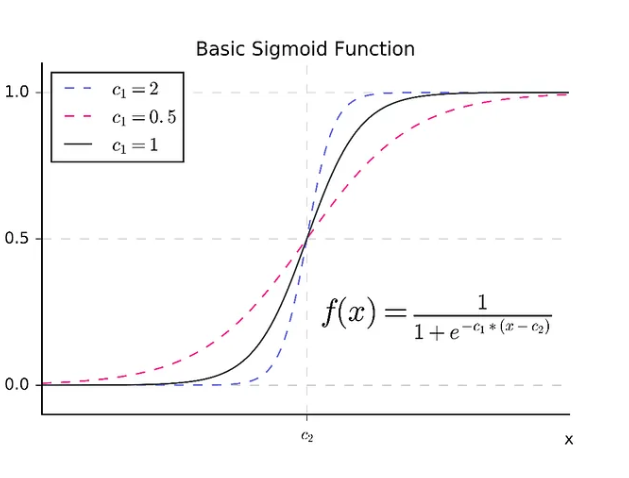
###The sigmoid function maps any value between 0 and 1. So the outcome of logistic regression becomes a probability. Let’s now build a logistic regression model with Scikit-learn.

In [ ]:
#Here I have used the solver="liblinear" parameter. It recommends using this parameter for small samples.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#Model Evaluation
##We’re going to use validation data to understand the performance of the model. Let’s preprocess the validation data as we did the training data before.

In [ ]:
val_dict = df_val[categorical+numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred[:5]

array([[0.97688117, 0.02311883],
       [0.68447648, 0.31552352],
       [0.90207617, 0.09792383],
       [0.97207148, 0.02792852],
       [0.67480452, 0.32519548]])

###As you can see, the predicts are between 0 and 1. These values ​​are the probabilities of the churn target variable. The model prediction will be 1 if the probability is greater than 0.5, and 0 if the probability is less than 0.5. Now let’s see the performance of the model with the score method on the validation and training dataset.

In [ ]:
print("The performance of the model on the validation dataset: ",
          model.score(X_val, y_val))
print("The performance of the model on the training dataset: ",
          model.score(X_train, y_train))


The performance of the model on the validation dataset:  0.7984386089425124
The performance of the model on the training dataset:  0.8011834319526627


###As you can see, the model’s scores on the validation and training dataset are about 80 percent. In order to avoid overfitting and underfitting problems in the model, we want the accuracy scores of the model to be close to 1 and close to each other. The model we built is not bad.

#Model Interpretation
###Thus, we trained a bias and a coefficient for each variable. Building a good model means finding the best coefficient combination. After training the model, we can see these coefficients with the methods in Scikit-learn as follows:

In [ ]:
print("Bias: ",model.intercept_[0])
print(dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

Bias:  -0.15327940587404726
{'contract=month-to-month': 0.62, 'contract=one_year': -0.075, 'contract=two_year': -0.698, 'dependents=no': -0.026, 'dependents=yes': -0.127, 'deviceprotection=no': 0.031, 'deviceprotection=no_internet_service': -0.123, 'deviceprotection=yes': -0.061, 'gender=female': -0.049, 'gender=male': -0.104, 'internetservice=dsl': -0.421, 'internetservice=fiber_optic': 0.39, 'internetservice=no': -0.123, 'monthlycharges': 0.003, 'multiplelines=no': -0.265, 'multiplelines=no_phone_service': 0.127, 'multiplelines=yes': -0.015, 'onlinebackup=no': 0.07, 'onlinebackup=no_internet_service': -0.123, 'onlinebackup=yes': -0.1, 'onlinesecurity=no': 0.183, 'onlinesecurity=no_internet_service': -0.123, 'onlinesecurity=yes': -0.214, 'paperlessbilling=no': -0.244, 'paperlessbilling=yes': 0.091, 'partner=no': -0.101, 'partner=yes': -0.052, 'paymentmethod=bank_transfer_(automatic)': -0.088, 'paymentmethod=credit_card_(automatic)': -0.205, 'paymentmethod=electronic_check': 0.236, 'pa

###Here, the coefficients are log odds. Once you exponentiate them, they turn into odds, and thus you can interpret them more clearly. A negative coefficient has odds < 1, meaning the odds of the event occurring are lower than the baseline; on the other hand, a positive coefficient has odds > 1, meaning increased odds of observing the event relative to the baseline.

#Predicting New Data
###After building the model, you can predict new data that the model has not seen before. To do this, I’m going to take the values ​​of a customer as follows:

In [ ]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 2990.75,
}

In [ ]:
#First, let’s preprocess the data with the transform method and then predict the label of this data using our model.
x_new = dv.transform([customer])
model.predict_proba(x_new)

array([[0.93539894, 0.06460106]])

###As you can see, the model found the probability of this customer leaving the service 7 percent, and the probability of not leaving the service is 93 percent. As a data scientist, you can tell the company you work for that this customer is unlikely to be unsubscribed, so there is no need to apply a promotion for this customer. Now let’s take another customer data and predict the label.

In [ ]:
customer2 = {
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 85.7,
 'totalcharges': 85.7
}

In [ ]:
#Now, let’s predict the label of data according to our model.
X_new2= dv.transform([customer2])
model.predict_proba(X_new2)

array([[0.18151558, 0.81848442]])

###As you can see, the probability of this customer leaving the service is 8o percent, so you can suggest the company apply a promotion to this customer.